In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Import Real Data

In [2]:
# Import all organism data and plot average melt curve
df_GBS = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20171128_GBS_C0AAFO_Run1_goodDerMelt.csv')
df_SG = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20180103_SGallo_C0CMZV_Run1_goodDerMelt.csv')
df_CK = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20180104_CKoseri_C0C5UX_Run1_goodDerMelt.csv')
df_L = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20171221_Listeria_C0CG0H_Run1_goodDerMelt.csv')
df_HI = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20171206_HInfluenzae_C0BZ9Q_Run1_goodDerMelt.csv')
df_SS = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20171129_Ssanguinis_C09J24_Run1_goodDerMelt.csv')
df_MSSA = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20171221_MSSA_C0CD12_Run1_goodDerMelt.csv')
df_SP = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20171206_StrepPneumo_C0B4VU_Run1_goodDerMelt.csv')
df_EF = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20171207_Efaecium_C0C2Q0_Run1_goodDerMelt.csv')
df_EC = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Meltcurves from Augustine/goodDer/20171221_Ecoli_C0C2ZD_Run1_goodDerMelt.csv')

## Subtract linear background

In [3]:
def subtract_lin_back(df):
    x = df.columns
    newdf = df.copy()
    for i in range(len(df)):
        lin_fit = np.polyfit(x[:300], df.iloc[i].values[:300], deg=1) # Fit to the initial 'noisy' region without melt peak
        newdf.iloc[i] = df.iloc[i].values-(lin_fit[0]*x+lin_fit[1])
    return newdf

In [4]:
dfs = [df_GBS, df_SG, df_CK, df_L, df_HI, df_SS, df_MSSA, df_SP, df_EF, df_EC]
labels = ['S. agalactiae', 'S. gallolyticus', 'C. koseri', 'L. monocytogenes', 'H. influenzae', 'S. sanguinis', 'S. aureus', 'S. pneumoniae', 'E. faecium', 'E. coli'] 

for df in dfs:
    df.columns = df.columns.map(float) 
    
for label,df in zip(labels,dfs):
    df.index = [label for i in range(len(df))]
    
dfs_lin_back = [subtract_lin_back(df) for df in dfs]

In [5]:
all_dfs = dfs_lin_back[0].copy()
for df in dfs_lin_back[1:]:
    all_dfs = pd.concat([all_dfs,df])
print(all_dfs.shape)

(18281, 410)


## Figure: compare original to linear background subtracted

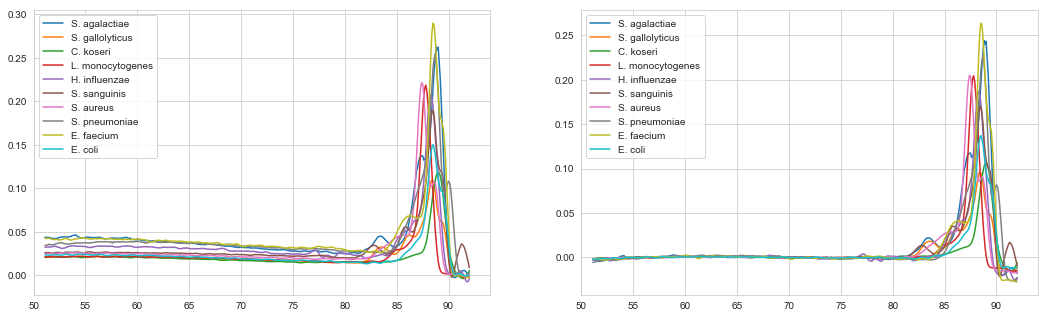

In [40]:
f, axs = plt.subplots(1, 2, figsize=(18,6.96/1.33))
axs.ravel()

for df in dfs:
    axs[0].plot(df.columns, df.mean(axis=0), label = df.index[0])

for df in dfs_lin_back:
    axs[1].plot(df.columns, df.mean(axis=0), label = df.index[0])

axs[0].set_xlim(50,94)
axs[1].set_xlim(50,94)
axs[0].legend()
axs[1].legend()

plt.savefig('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Supplementary Figures/FigureS1b.svg', bbox_inches='tight')

plt.show()

### Example

[-0.00093556  0.09771555]


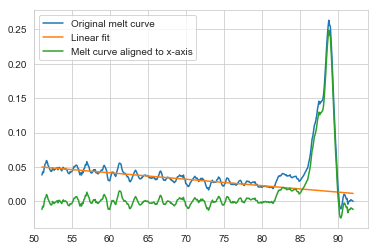

In [39]:
x = df_GBS.columns.copy()
lin_fit = np.polyfit(x[:300], df_GBS.iloc[0].values[:300], deg=1)
print(lin_fit)

plt.plot(x, df_GBS.iloc[0].values, label='Original melt curve')
plt.plot(x,lin_fit[0]*x+lin_fit[1], label='Linear fit')

plt.plot(x, df_GBS.iloc[0].values-(lin_fit[0]*x+lin_fit[1]), label='Melt curve aligned to x-axis')
plt.legend()
plt.xlim(50,94)

plt.savefig('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Supplementary Figures/FigureS1.svg', bbox_inches='tight')

plt.show()

# Import uMelts

In [16]:
df_58_norm_shifted = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Data/df_58_norm_shifted.csv', index_col=0)
print(df_58_norm_shifted.shape)
df_58_norm_shifted = df_58_norm_shifted.drop(['Enterococcus faecium', 'Escherichia coli', 'Haemophilus influenzae', 'Listeria monocytogenes', 'Staphylococcus aureus', 'Streptococcus agalactiae', 'Streptococcus pneumoniae', 'Streptococcus sanguinis'])
print(df_58_norm_shifted.shape)

(58, 170)
(50, 170)


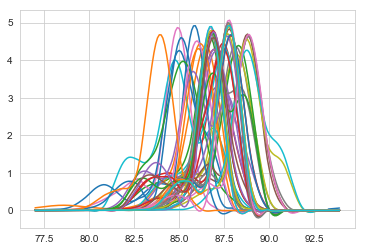

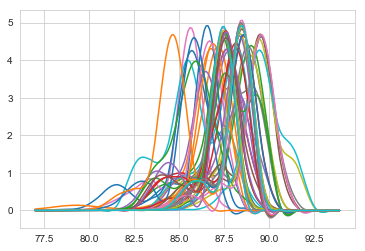

In [17]:
rolled = pd.DataFrame(np.roll(df_58_norm_shifted.values, -7), index=df_58_norm_shifted.index, columns=df_58_norm_shifted.columns)

for i in rolled.values:
    plt.plot(rolled.columns.map(float), i)
# plt.xlim(90,92)
# plt.ylim(0,1)
plt.show()

for i in df_58_norm_shifted.values:
    plt.plot(df_58_norm_shifted.columns.map(float), i)
plt.show()

In [18]:
# Make same format (58 x 410)
leading_zeros = pd.DataFrame(np.zeros((df_58_norm_shifted.shape[0],259)), index=df_58_norm_shifted.index, columns=np.round(np.linspace(51.1, 76.9, 259),2))
df_50 = pd.concat((leading_zeros, rolled.iloc[:,:-19]), axis=1)
print(df_50.shape)
df_50.columns = df_50.columns.map(float)

(50, 410)


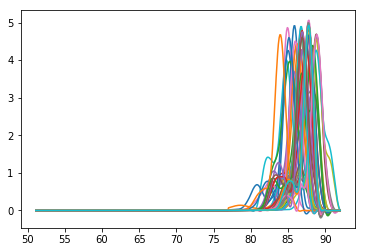

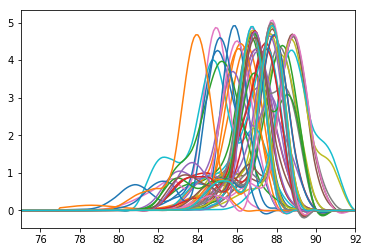

In [41]:
for i in df_50.values:
    plt.plot(df_50.columns, i)
plt.show()

for i in df_50.values:
    plt.plot(df_50.columns, i)
plt.xlim(75,92)
plt.show()

### Normalize to similar peak heights

0.18817033706787412
4.53263305537304


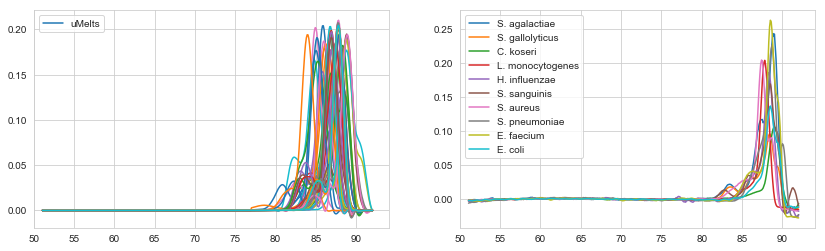

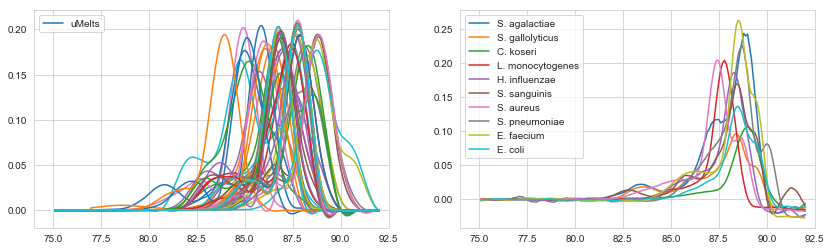

In [41]:
# Compare peak heights
# print(df_all_alignedbyOrg_1_auc_norm.max(axis=1).mean())
print(all_dfs.max(axis=1).mean())
print(df_50.max(axis=1).mean())

df_50_norm = df_50.divide(df_50.max(axis=1).mean()/all_dfs.max(axis=1).mean())

for j in [0,240]:
    fig,axs = plt.subplots(1,2, figsize=(14,4))
    axs = axs.ravel()

    for l,i in enumerate(df_50_norm.values):
        axs[0].plot(df_50_norm.columns[j:], i[j:], label='uMelts' if l==0 else '')

    for label in labels:
        axs[1].plot(all_dfs.columns[j:],all_dfs.loc[label].mean(axis=0).values[j:], label=label)
    axs[0].legend(loc='upper left')
    axs[1].legend()
    if j==0:
        axs[0].set_xlim(50,94)
        axs[1].set_xlim(50,94)
        plt.savefig('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Supplementary Figures/FigureS2.svg', bbox_inches='tight')
    else:
        axs[0].set_xlim(74,92.5)
        axs[1].set_xlim(74,92.5)
        plt.savefig('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Supplementary Figures/FigureS2b.svg', bbox_inches='tight')
  
    plt.show()



# Write to csv

In [154]:
df_50_norm.to_csv('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Data/df_50_norm.csv')
all_dfs.to_csv('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Data/all_dfs.csv')

### Add noise for more realism

In [82]:
from random import seed, gauss
from scipy.signal import savgol_filter

mean_noise =  df_all_alignedbyOrg_1_auc_norm.iloc[:,:200].mean().mean()
std_noise = df_all_alignedbyOrg_1_auc_norm.iloc[:,:200].std(axis=1).mean()
print(mean_noise,std_noise)

df_50_norm_noisy = pd.DataFrame(columns=df_all_alignedbyOrg_1_auc_norm.columns.map(float))
nonzero = df_50_norm[df_50_norm>0.001]
for i in range(df_50_norm.shape[0]):
    nonzeroindex = float(nonzero.iloc[i].first_valid_index())
    noise_length = round(nonzeroindex - df_50_norm.columns.map(float).values[0],2)

    five_last_values = df_50_norm.iloc[i,int(noise_length*10)-5:int(noise_length*10)].values+mean_noise
    for j in range(1):
        # seed random number generator
        seed(i)
        # create white noise series    
        series = [gauss(mean_noise, std_noise) for i in range(30)] + list(five_last_values)
        # interpolate
        series_int = np.interp(np.linspace(0,30,int(noise_length*10)), range(35), series)
        # smooth
        series_savgol = savgol_filter(series_int,21,2)
        # Create noisy series
        noisy_series = list(series_savgol) + list(df_50_norm.iloc[i,len(series_savgol):].values+mean_noise)
        noisy_series = pd.Series(noisy_series, index=df_all_alignedbyOrg_1_auc_norm.columns, name=df_50_norm.index[i])
        # append 
        df_50_norm_noisy = df_50_norm_noisy.append(noisy_series)
df_50_norm_noisy.to_csv('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Data/df_50_norm_noisy.csv')

0.021139220162671505 0.004459678082321176


### Compare curves side by side

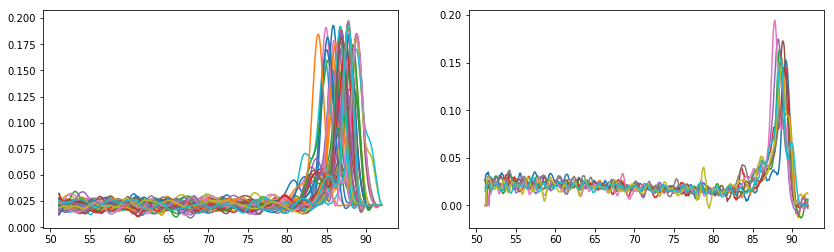

In [80]:
fig,axs = plt.subplots(1,2, figsize=(14,4))
axs = axs.ravel()
for label in df_50_norm.index.values:
    axs[0].plot(df_50_norm_noisy.columns, df_50_norm_noisy.loc[label].values)

for label in labels:
    axs[1].plot(df_all_alignedbyOrg_1_auc_norm.columns.map(float), df_all_alignedbyOrg_1_auc_norm.loc[label].iloc[0].values)
plt.show()

# Add real melt curve noise

### Prep

In [205]:
df_umelt = df_50_norm # uMelt df
dfs_residuals = [df - df.mean(axis=0) for df in dfs_lin_back] # Residual df
dfs_residuals_padded = [pd.DataFrame([padding_function3(i) for i in model.values]) for model in dfs_residuals]

np.random.seed(42)
residual_indices = [np.random.randint(0, high=len(df), size=500) for df in dfs_residuals]

In [222]:
noisy_umelts = pd.DataFrame()

for uMelt_nr in range(len(df_umelt)):
    for model_nr in range(len(dfs_residuals)):

        # Get peak information from model
        mean = dfs_lin_back[model_nr].mean(axis=0)
        peak_height = max(mean) 
        peak_loc = float(mean.idxmax())
#         print(peak_height, peak_loc)

        # Get uMelt information
        umelt = df_umelt.iloc[uMelt_nr].values
        maxidx = float(df_umelt.iloc[uMelt_nr].idxmax())
        ratio = max(df_umelt.iloc[uMelt_nr].values)/peak_height    

        for k in residual_indices[model_nr][uMelt_nr*10:uMelt_nr*10+10]:
            perturb = pd.Series(umelt+np.roll(dfs_residuals_padded[model_nr].iloc[k].values, int((maxidx-peak_loc)*10))*ratio, 
                                name=df_50_norm.index[uMelt_nr])
            noisy_umelts = noisy_umelts.append(perturb,ignore_index=False)
            
#             plt.plot(range(len(df_umelt.iloc[uMelt_nr].values)), df_umelt.iloc[uMelt_nr].values, label=model_nr)
#             plt.plot(range(len(perturb)),perturb)
#             plt.legend()
#             plt.show()
print(noisy_umelts.shape)

(5000, 410)


In [227]:
noisy_umelts.columns = df_50_norm.columns
noisy_umelts.to_csv('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Data/df_50_norm_noisy(noise_models).csv')

# Plot noisy umelts

In [33]:
noisy_umelts = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Data/df_50_norm_noisy(noise_models).csv', index_col=0)
df_50_norm = pd.read_csv('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Data/df_50_norm.csv', index_col=0)

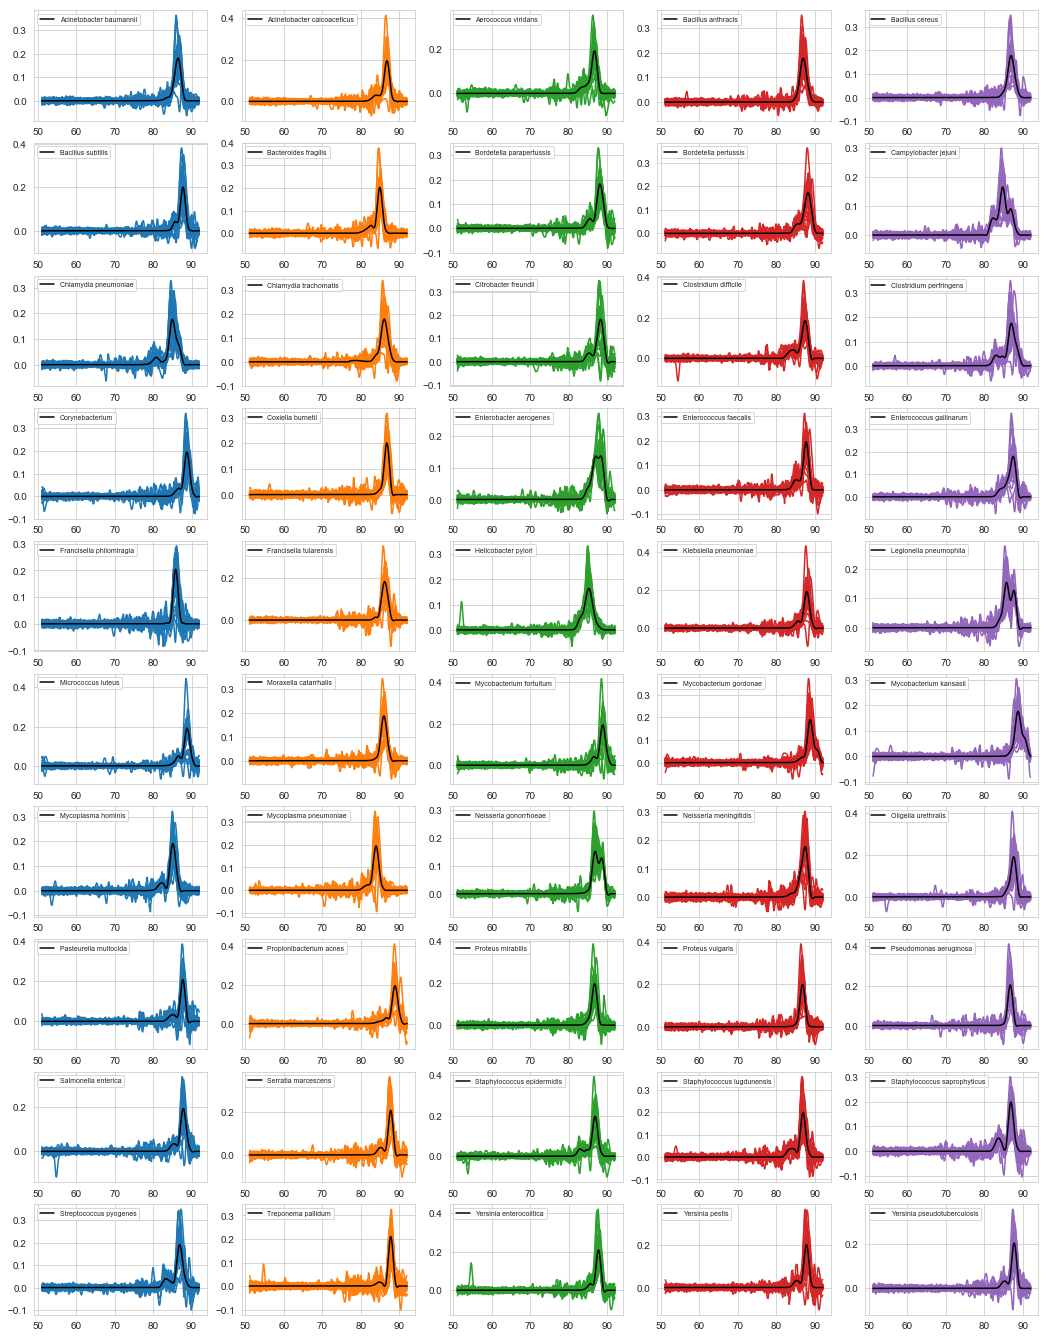

In [43]:
import itertools
colors = itertools.cycle(('C0','C1','C2','C3','C4'))

f, axes = plt.subplots(10, 5, figsize=(18,24))

index = noisy_umelts.columns.map(float)
for ax,label in zip (axes.ravel(),np.unique(noisy_umelts.index)):
    color = next(colors)
    for i in range(100):
        ax.plot(index, noisy_umelts.loc[label].iloc[i].values, color=color)
    ax.plot(index, df_50_norm.loc[label].values, color='k', label=label)
    ax.legend(loc='upper left', fontsize='x-small')
plt.savefig('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Supplementary Figures/FigureS3.png', dpi=1200, bbox_inches='tight')
plt.show()

# Plot noisy uMelt side-by-side with real melts

In [31]:
long_labels = ['Citrobacter koseri', 'Escherichia coli', 'Enterococcus faecium', 'Haemophilus influenzae', 'Listeria monocytogenes',
'Streptococcus agalactiae', 'Staphylococcus aureus', 'Streptococcus gallolyticus', 'Streptococcus pneumoniae', 
'Streptococcus sanguinis']

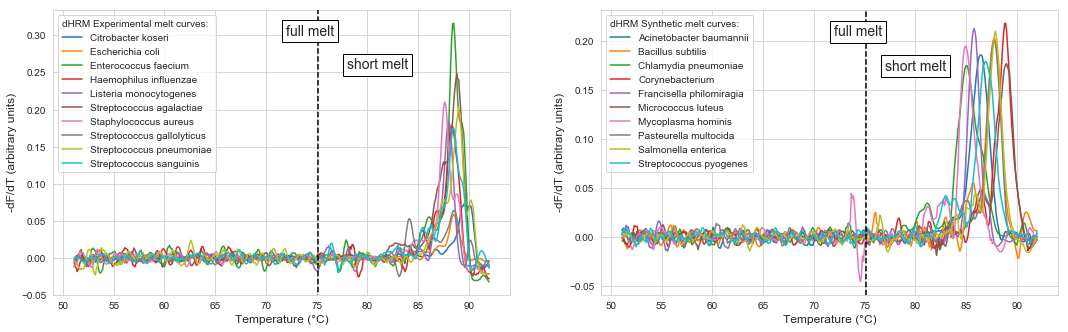

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6.96/1.33))

for i,label in enumerate(np.unique(all_dfs.index)):
    ax1.plot(all_dfs.columns.map(float),all_dfs.loc[label].iloc[0], label=long_labels[i])
ax1.set_xlabel('Temperature (°C)', fontsize=12)
ax1.set_ylabel('-dF/dT (arbitrary units)', fontsize=12)
leg1 = ax1.legend(title='dHRM Experimental melt curves:')
leg1._legend_box.align = "left"


for label in np.unique(noisy_umelts.index)[::5]:
    ax2.plot(noisy_umelts.columns.map(float),noisy_umelts.loc[label].iloc[1], label=label)
ax2.set_xlabel('Temperature (°C)', fontsize=12)
ax2.set_ylabel('-dF/dT (arbitrary units)', fontsize=12)
leg2 = ax2.legend(title='dHRM Synthetic melt curves:')
leg2._legend_box.align = "left"


ax1lim = ax1.get_ylim()
ax2lim = ax2.get_ylim()

# Plot vlines to show short version
ax1.vlines(x=all_dfs.columns.map(float)[240], ymin=-0.1, ymax=0.4, color='k', linestyle='dashed', zorder=3)
ax2.vlines(x=all_dfs.columns.map(float)[240], ymin=-0.1, ymax=0.4, color='k', linestyle='dashed', zorder=3)

ax1.set_ylim(ax1lim)
ax2.set_ylim(ax2lim)

ax1.text(72,0.3, 'full melt', fontsize=14,bbox=dict(facecolor='white', edgecolor='k'))
ax1.text(78,0.255, 'short melt', fontsize=14,bbox=dict(facecolor='white', edgecolor='k'))
ax2.text(72,0.205, 'full melt', fontsize=14,bbox=dict(facecolor='white', edgecolor='k'))
ax2.text(77,0.17, 'short melt', fontsize=14,bbox=dict(facecolor='white', edgecolor='k'))

plt.savefig('//172.16.236.148/meltanalysis2/Lennart/Publications/2. Probabilistic novelty detection/Figures/Figure2.svg', bbox_inches='tight')
plt.show()

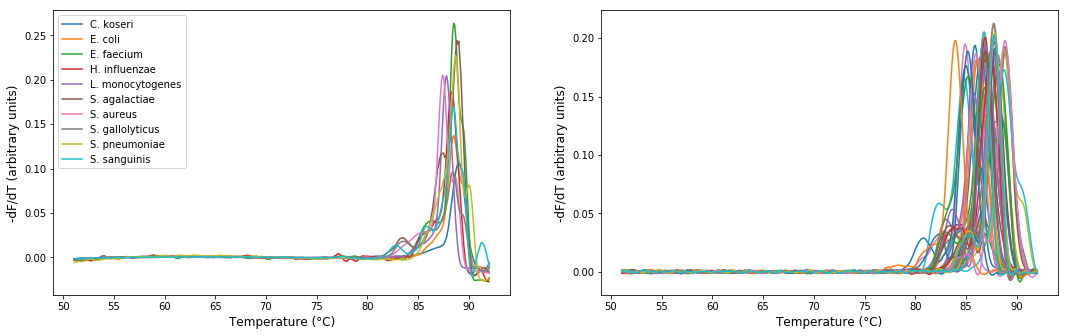

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6.96/1.33))

for label in np.unique(all_dfs.index):
    ax1.plot(all_dfs.columns.map(float),all_dfs.loc[label].mean(axis=0), label=label)
ax1.set_xlabel('Temperature (°C)', fontsize=12)
ax1.set_ylabel('-dF/dT (arbitrary units)', fontsize=12)
ax1.legend()

for label in np.unique(noisy_umelts.index):
    ax2.plot(noisy_umelts.columns.map(float),noisy_umelts.loc[label].mean(axis=0), label=label)
ax2.set_xlabel('Temperature (°C)', fontsize=12)
ax2.set_ylabel('-dF/dT (arbitrary units)', fontsize=12)
plt.show()

# Helper Functions

In [189]:
from scipy.interpolate import interp1d
def padding_function3(i):
    x = np.concatenate((np.arange(5),np.arange(15,20)))
#     y = np.concatenate((i[-5:], i[:5]))
    y = np.concatenate((i[-10:-5], i[5:10])) # Cut off 5 points at each end
    f = interp1d(x, y, kind='cubic') # Make cubic interpolation to connect both ends (make cyclical)
    return np.concatenate((f(np.arange(10,15)),i[5:-5],f(np.arange(5,10)))) # Concatenate cyclical ends with middle part
#     return np.concatenate((f(np.arange(10,15)),i,f(np.arange(5,10))))

def perturb_shifted_delta(n_org, n_curves, df_umelt, residuals_dfs, peak_loc, peak_height):   
    perturbed_2 = []
    for i in range(n_org):
        perturbed = []
        mean = df_umelt.iloc[i].values
        index = df_umelt.iloc[i].index.values
        maxidx = float(df_umelt.iloc[i].idxmax())
        ratio = max(df_umelt.iloc[i].values)/peak_height
        
        for k in range(n_curves):
            perturb = mean+np.roll(residuals_dfs[i].iloc[k].values, int((maxidx-peak_loc)*10))*ratio
            perturbed.append(perturb)
        perturbed_2.append(pd.DataFrame(perturbed) )
    return perturbed_2

In [42]:
def get_auc(df):
    auc_values = []
    for i in range(0, len(df.index)):
        row = df.iloc[i]
        x = df.columns.values.astype(float)
        y = row.values
        auc_values.append(metrics.auc(x, y))
    return pd.Series(auc_values, index=df.index)